In [1]:
import boto3
import sagemaker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name



#### Data Ingestion

For this project, we explored 2 different methods to ingest the data. One method was to leverage pyathena in order to query the 3 data files individually and join them together in sagemaker. This method was more manual work and was using our limited sagemaker resources and so we also ingested data by uploading a joined singular file of our 3 data files to S3, and importing that singular file using boto.

#### Data Ingestion using PyAthena

In [2]:
from pyathena import connect

In [3]:
s3_articles_path = "s3://ads508sanjay/Articles"
s3_customers_path = "s3://ads508sanjay/Customers/"
s3_transactions_path = "s3://ads508sanjay/Transactions/"

In [4]:
%store s3_articles_path  
%store s3_customers_path  
%store s3_transactions_path

Stored 's3_articles_path' (str)
Stored 's3_customers_path' (str)
Stored 's3_transactions_path' (str)


##### Creating Database

In [5]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

# Set Athena parameters
database_name = "clothingstore"

In [6]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [7]:
statement = "CREATE DATABASE IF NOT EXISTS {}".format(database_name)
print(statement)

CREATE DATABASE IF NOT EXISTS clothingstore


In [8]:
pd.read_sql(statement, conn)

""


In [9]:
statement = "SHOW DATABASES"

df_show = pd.read_sql(statement, conn)
df_show.head(10)

,database_name
0,clothingstore
1,default


##### Creating Table Customers

In [10]:
table_name = "customers"

In [11]:
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         customer_id string,
         FN boolean,
         active boolean,
         club_member_status string,
         fashion_news_frequency string,
         age int,
         postal_code string  
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ',' 
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '{}'
TBLPROPERTIES ('skip.header.line.count'='1')""".format(
    database_name, table_name, s3_customers_path
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS clothingstore.customers(
         customer_id string,
         FN boolean,
         active boolean,
         club_member_status string,
         fashion_news_frequency string,
         age int,
         postal_code string  
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ',' 
LINES TERMINATED BY '
'
STORED AS TEXTFILE
LOCATION 's3://ads508sanjay/Customers/'
TBLPROPERTIES ('skip.header.line.count'='1')


In [12]:
import pandas as pd

pd.read_sql(statement, conn)

""


In [13]:
##### Verify Tables

In [14]:
statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(5)

,tab_name
0,customers


In [15]:
statement = """SELECT * FROM {}.{}""".format(
    database_name, table_name
)

print(statement)

SELECT * FROM clothingstore.customers


In [16]:
df_customers = pd.read_sql(statement, conn)
df_customers.head(5)

,customer_id,fn,active,club_member_status,fashion_news_frequency,age,postal_code
0,e7b31c8675c0cb7c3949a8c1855622db5ba301dde3dc1a...,None,None,ACTIVE,NONE,20.0,69af807b7f03d852829a2494fa9b4b2ee252dc68ce1648...
1,e7b320e11641129e1c53c5b41f0ecdf30ff32b14264cb6...,None,None,ACTIVE,Regularly,25.0,90d6190a8884dbfda10664bae0c7ecd6ab36e7925109a6...
2,e7b333dd8440b78f3cc8879def8d10a12c14fd4b7cf8a6...,None,None,ACTIVE,Regularly,25.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
3,e7b346448cb6a11904b059465924155afa9e145b7c207b...,None,None,ACTIVE,Monthly,22.0,012c8bec829a681a72ca68a9fc87ad9a151589d74b2818...
4,e7b34fe9acb16c3ca33f26c56721b63f53e1079add5865...,None,None,ACTIVE,NONE,20.0,9a0b888bf5fc4ebd83ac69edf959e1c301f056cf533ab6...


#### Create Table Articles

In [17]:
table_name = "articles"

In [18]:
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         article_id string,
         product_code string,
         prod_name string,
         product_type_no string,
         product_type_name string,
         product_group_name string,
         graphical_appearance_no string,
         graphical_appearance_name string,
         colour_group_code string,
         colour_group_name string,
         perceived_colour_value_id string,
         perceived_colour_value_name string,
         perceived_colour_master_id string,
         perceived_colour_master_name string,
         department_no string,
         department_name string,
         index_code string,
         index_name string,
         index_group_no string,
         index_group_name string,
         section_no string,
         section_name string,
         garment_group_no string,
         garment_group_name string,
         detail_desc  string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '{}'
TBLPROPERTIES ('skip.header.line.count'='1')""".format(
    database_name, table_name, s3_articles_path
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS clothingstore.articles(
         article_id string,
         product_code string,
         prod_name string,
         product_type_no string,
         product_type_name string,
         product_group_name string,
         graphical_appearance_no string,
         graphical_appearance_name string,
         colour_group_code string,
         colour_group_name string,
         perceived_colour_value_id string,
         perceived_colour_value_name string,
         perceived_colour_master_id string,
         perceived_colour_master_name string,
         department_no string,
         department_name string,
         index_code string,
         index_name string,
         index_group_no string,
         index_group_name string,
         section_no string,
         section_name string,
         garment_group_no string,
         garment_group_name string,
         detail_desc  string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES T

In [19]:
import pandas as pd

pd.read_sql(statement, conn)

""


In [20]:
statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(5)

,tab_name
0,articles
1,customers


In [21]:
statement = """SELECT * FROM {}.{}""".format(
    database_name, table_name
)

print(statement)

SELECT * FROM clothingstore.articles


In [22]:
df_articles = pd.read_sql(statement, conn)
df_articles.head(5)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0712476001,0712476,Peter pull-on trs 2-p,272,Trousers,Garment Lower body,1010016,Solid,73,Dark Blue,...,Baby Boy Jersey Fancy,G,Baby Sizes 50-98,4,Baby/Children,41,Baby Boy,1005,Jersey Fancy,Pull-on trousers in cotton jersey with covered...
1,0712483001,0712483,Letitcia Bikini,299,Swimwear set,Swimwear,1010001,All over pattern,73,Dark Blue,...,Young Girl Swimwear,J,"""Children Accessories","Swimwear""",4,Baby/Children,43,"""Kids Accessories","Swimwear & D""",1018
2,0712483002,0712483,Letitcia Bikini,299,Swimwear set,Swimwear,1010001,All over pattern,20,Other Yellow,...,Young Girl Swimwear,J,"""Children Accessories","Swimwear""",4,Baby/Children,43,"""Kids Accessories","Swimwear & D""",1018
3,0712483005,0712483,Letitcia Bikini,299,Swimwear set,Swimwear,1010021,Lace,73,Dark Blue,...,Young Girl Swimwear,J,"""Children Accessories","Swimwear""",4,Baby/Children,43,"""Kids Accessories","Swimwear & D""",1018
4,0712483006,0712483,Letitcia Bikini,299,Swimwear set,Swimwear,1010021,Lace,40,Other Red,...,Young Girl Swimwear,J,"""Children Accessories","Swimwear""",4,Baby/Children,43,"""Kids Accessories","Swimwear & D""",1018


#### Create Table Transactions

In [23]:
table_name = "transactions"

In [24]:
statement = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         t_dat string,
         customer_id string,
         article_id string,
         price int,
         sales_channel_id string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE
LOCATION '{}'
TBLPROPERTIES ('skip.header.line.count'='1')""".format(
    database_name, table_name, s3_transactions_path
)

print(statement)

CREATE EXTERNAL TABLE IF NOT EXISTS clothingstore.transactions(
         t_dat string,
         customer_id string,
         article_id string,
         price int,
         sales_channel_id string
         
         
) ROW FORMAT DELIMITED 
FIELDS TERMINATED BY ','
LINES TERMINATED BY '
'
STORED AS TEXTFILE
LOCATION 's3://ads508sanjay/Transactions/'
TBLPROPERTIES ('skip.header.line.count'='1')


In [25]:
import pandas as pd

pd.read_sql(statement, conn)

""


In [26]:
statement = "SHOW TABLES in {}".format(database_name)

df_show = pd.read_sql(statement, conn)
df_show.head(5)

,tab_name
0,articles
1,customers
2,transactions


In [27]:
statement = """SELECT * FROM {}.{}""".format(
    database_name, table_name
)

print(statement)

SELECT * FROM clothingstore.transactions


In [28]:
df_transactions = pd.read_sql(statement, conn)
df_transactions.head(5)

,t_dat,customer_id,article_id,price,sales_channel_id
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0,1
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,0,2
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,0,1
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,0,1
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,0,2


#### Data Ingestion using Boto

In [29]:
s3_transactions_combined_path = "s3://ads508sanjay/transactions_combined.csv"

In [30]:
s3_client = boto3.client("s3")

BUCKET='ads508sanjay'
KEY='transactions_combined.csv'

response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
df_transactions_combined = pd.read_csv(response.get("Body"))

In [31]:
df_transactions_combined.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,741220004,0.005068,1,741220,Maria Shorts.,274,Shorts,Garment Lower body,...,Divided Basics,1002,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,NaN,NaN,ACTIVE,NONE,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...
1,1/31/20,3fa3367e7c72c440fd9ef4563b233bc9e877db2f28fade...,804750002,0.015237,2,804750,Charlotte Padded Milano Cradle,306,Bra,Underwear,...,Womens Lingerie,1017,"Under-, Nightwear","Lace bra with underwired, padded cups that sha...",1.0,1.0,ACTIVE,Regularly,18.0,326462f4d7add11ad4bad886ca8ccd7a22d0aeca51b719...
2,1/4/20,43454a2c49ebf0c98834cee9185f01b0f763e1af1087e5...,812683003,0.050831,1,812683,Notting Hill,265,Dress,Garment Full body,...,Womens Everyday Collection,1013,Dresses Ladies,"Long dress in an airy weave with a round, gath...",NaN,NaN,ACTIVE,NONE,32.0,7864d53926434725636c8c550ad149c742df5252949724...
3,1/11/20,2421500a485100574700923072d3769b7b8f966c7073f4...,748269003,0.025407,1,748269,Laura short sleeve polo,254,Top,Garment Upper body,...,Womens Tailoring,1003,Knitwear,"Jumper in a soft, fine-knit viscose blend with...",NaN,NaN,ACTIVE,NONE,44.0,66436f5dfbcbc6a5ce99a2de6f30d7d1a7189e09d3194b...
4,5/28/19,14225dc6d582044a43a6a0ef9191ca51ac06b870960be5...,608213007,0.033881,2,608213,ED Sorrel dress,265,Dress,Garment Full body,...,H&M+,1010,Blouses,Straight-cut dress in a soft viscose weave wit...,NaN,NaN,ACTIVE,NONE,48.0,bb07257a124699953138300becad8e437b0884f5b7c3bb...


#### Data Exploration

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [33]:
sns.set_style = "seaborn-whitegrid"

sns.set(
    rc={
        "font.style": "normal",
        "axes.facecolor": "white",
        "grid.color": ".8",
        "grid.linestyle": "-",
        "figure.facecolor": "white",
        "figure.titlesize": 20,
        "text.color": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "axes.labelcolor": "black",
        "axes.grid": True,
        "axes.labelsize": 10,
        "xtick.labelsize": 10,
        "font.size": 10,
        "ytick.labelsize": 10,
    }
)


In [34]:
def show_values_barplot(axs, space):
    def _show_on_plot(ax):
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = round(float(p.get_width()), 2)
            ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_plot(ax)
    else:
        _show_on_plot(axs)


### Visualizations

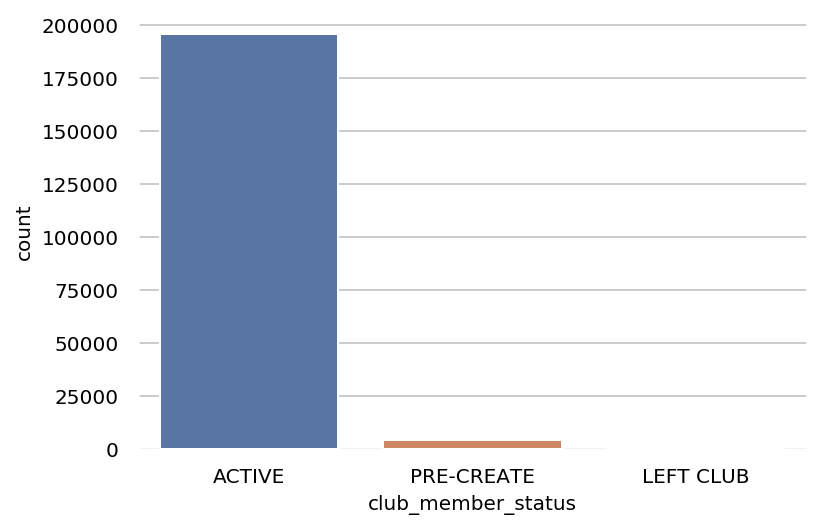

In [35]:
club_member_count_viz = sns.countplot(x="club_member_status", data=df_transactions_combined)

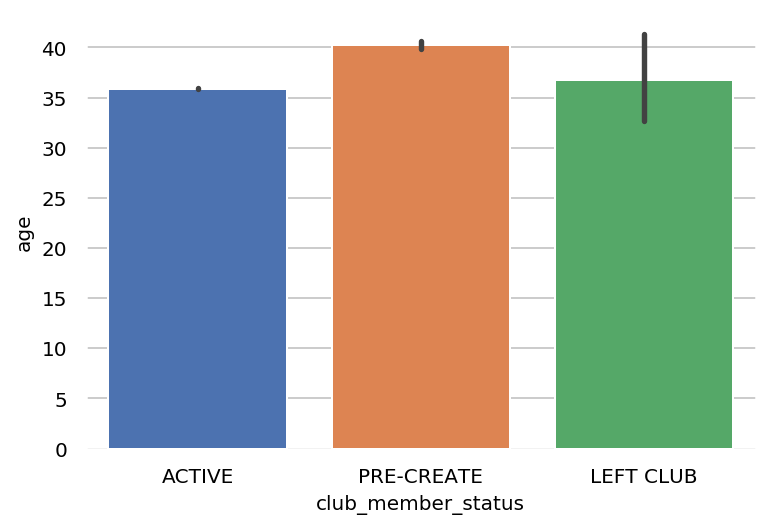

In [36]:
club_member_age_viz =  sns.barplot(y="age", x="club_member_status", data=df_transactions_combined, saturation=1)

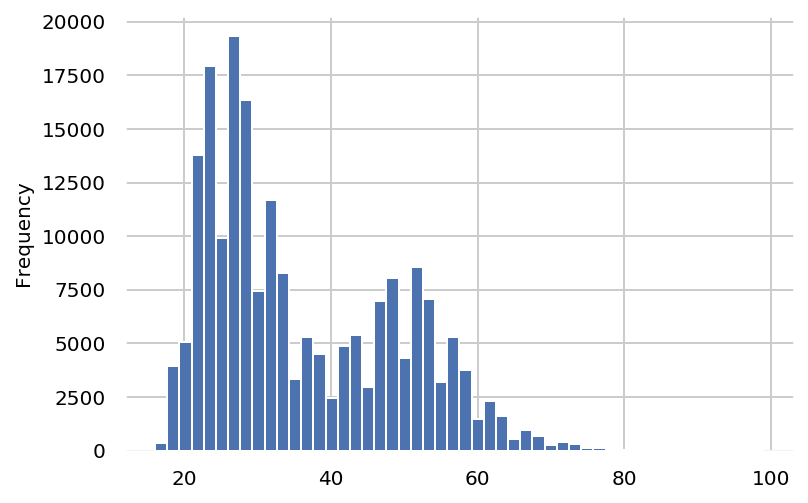

In [37]:
df_transactions_combined["age"].plot.hist(bins=50)

#### Type Transformation

In [38]:
df_transactions_combined['article_id'] = df_transactions_combined['article_id'].astype('str').dtypes
df_transactions_combined['product_code'] = df_transactions_combined['product_code'].astype('str').dtypes
df_transactions_combined['product_type_no'] = df_transactions_combined['product_type_no'].astype('str').dtypes
df_transactions_combined['colour_group_code'] = df_transactions_combined['colour_group_code'].astype('str').dtypes
df_transactions_combined['graphical_appearance_no'] = df_transactions_combined['graphical_appearance_no'].astype('str').dtypes
df_transactions_combined['perceived_colour_value_id'] = df_transactions_combined['perceived_colour_value_id'].astype('str').dtypes
df_transactions_combined['perceived_colour_master_id'] = df_transactions_combined['perceived_colour_master_id'].astype('str').dtypes
df_transactions_combined['department_no'] = df_transactions_combined['department_no'].astype('str').dtypes
df_transactions_combined['index_code'] = df_transactions_combined['index_code'].astype('str').dtypes
df_transactions_combined['index_group_no'] = df_transactions_combined['index_group_no'].astype('str').dtypes
df_transactions_combined['section_no'] = df_transactions_combined['section_no'].astype('str').dtypes
df_transactions_combined['garment_group_no'] = df_transactions_combined['garment_group_no'].astype('str').dtypes
df_transactions_combined['FN'] = df_transactions_combined['FN'].astype('category').dtypes
df_transactions_combined['Active'] = df_transactions_combined['Active'].astype('category').dtypes
df_transactions_combined['club_member_status'] = df_transactions_combined['club_member_status'].astype('category').dtypes
df_transactions_combined['fashion_news_frequency'] = df_transactions_combined['fashion_news_frequency'].astype('category').dtypes

#### Data Preparation

In [39]:
#Copy the dataframe so if you make any mistakes we can easily revert the changes
df_transact = df_transactions_combined

##### Change format of the price variable

In [40]:
df_transact['price'] = round(df_transact['price']*100,2)

#### Remove Null Values

In [41]:
df_transact = df_transact.dropna(subset=['age', 'detail_desc'])

In [42]:
df_transact.isnull().sum()

t_dat                           0
customer_id                     0
article_id                      0
price                           0
sales_channel_id                0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
FN            

#### Impute Null Values

In [43]:
df_transact['FN'] = df_transact['FN'].fillna(0)
df_transact['Active'] = df_transact['Active'].fillna(0)
df_transact['club_member_status'] = df_transact['club_member_status'].fillna(0)
df_transact['fashion_news_frequency'] = df_transact['fashion_news_frequency'].fillna(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [44]:
df_transact.isnull().sum()

t_dat                           0
customer_id                     0
article_id                      0
price                           0
sales_channel_id                0
product_code                    0
prod_name                       0
product_type_no                 0
product_type_name               0
product_group_name              0
graphical_appearance_no         0
graphical_appearance_name       0
colour_group_code               0
colour_group_name               0
perceived_colour_value_id       0
perceived_colour_value_name     0
perceived_colour_master_id      0
perceived_colour_master_name    0
department_no                   0
department_name                 0
index_code                      0
index_name                      0
index_group_no                  0
index_group_name                0
section_no                      0
section_name                    0
garment_group_no                0
garment_group_name              0
detail_desc                     0
FN            

In [45]:
df_selected=df_transact[['product_type_name','club_member_status','department_name','section_name','Active','garment_group_name','sales_channel_id','price','age']]

In [46]:
df_selected.head()

,product_type_name,club_member_status,department_name,section_name,Active,garment_group_name,sales_channel_id,price,age
0,Shorts,category,Basic 1,Divided Basics,category,Jersey Basic,1,0.51,20.0
1,Bra,category,Expressive Lingerie,Womens Lingerie,category,"Under-, Nightwear",2,1.52,18.0
2,Dress,category,Dress,Womens Everyday Collection,category,Dresses Ladies,1,5.08,32.0
3,Top,category,Knitwear,Womens Tailoring,category,Knitwear,1,2.54,44.0
4,Dress,category,Woven top,H&M+,category,Blouses,2,3.39,48.0


In [47]:
count_class_2, count_class_1= df_selected.sales_channel_id.value_counts()

# Divide by class
df_class_1 = df_selected[df_selected['sales_channel_id'] == 1]
df_class_2 = df_selected[df_selected['sales_channel_id'] == 2]

In [48]:
df_class_1.head()

,product_type_name,club_member_status,department_name,section_name,Active,garment_group_name,sales_channel_id,price,age
0,Shorts,category,Basic 1,Divided Basics,category,Jersey Basic,1,0.51,20.0
2,Dress,category,Dress,Womens Everyday Collection,category,Dresses Ladies,1,5.08,32.0
3,Top,category,Knitwear,Womens Tailoring,category,Knitwear,1,2.54,44.0
11,Bra,category,Expressive Lingerie,Womens Lingerie,category,"Under-, Nightwear",1,2.54,49.0
13,Hair ties,category,Hair Accessories,Womens Small accessories,category,Accessories,1,0.68,20.0


In [49]:
#print(count_class_1)
print(count_class_2)

139924


#### Rebalance Dataset

In [50]:
df_class_2_under = df_class_2.sample(count_class_1)
df_test_under = pd.concat([df_class_2_under, df_class_1], axis=0)

In [51]:
df_test_under.head()

,product_type_name,club_member_status,department_name,section_name,Active,garment_group_name,sales_channel_id,price,age
83202,Blazer,category,Suit,Womens Tailoring,category,Dressed,2,5.08,57.0
183350,Blouse,category,Blouse,Womens Everyday Collection,category,Blouses,2,3.39,28.0
189986,Top,category,Jersey fancy,Womens Everyday Collection,category,Jersey Fancy,2,1.69,50.0
181881,Top,category,Tops Fancy Jersey,Divided Collection,category,Jersey Fancy,2,1.18,31.0
24775,Blouse,category,Divided+,Divided Projects,category,Unknown,2,2.54,26.0


In [52]:
df_test_under.sales_channel_id.value_counts()

2    58510
1    58510
Name: sales_channel_id, dtype: int64

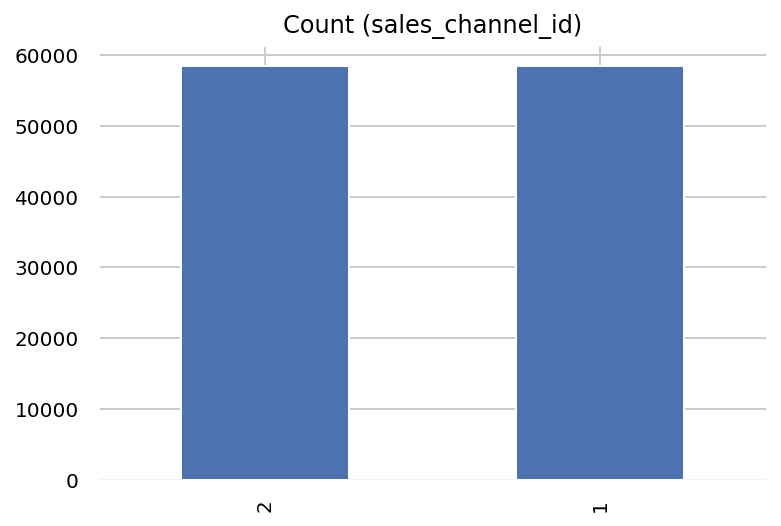

In [53]:
df_test_under.sales_channel_id.value_counts().plot(kind='bar', title='Count (sales_channel_id)');

#### Hot Encoding

In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
one_hot_encoder = OneHotEncoder(sparse=False, drop = "first")# dropping first to avoid dummy variable trap

In [56]:
categorical_vars =['product_type_name','club_member_status','department_name','section_name','Active','garment_group_name','sales_channel_id']

In [57]:
OHE = one_hot_encoder.fit(df_test_under[categorical_vars])

In [58]:
#The new dataframe is : df_test_under Use this !
encoder_vars_array = OHE.transform(df_test_under[categorical_vars])

In [59]:
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

In [60]:
df_categorical=pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)

In [61]:
df_categorical.head()

,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blazer,product_type_name_Blouse,product_type_name_Bodysuit,...,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby,sales_channel_id_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [62]:
numeric_vars=['price','age']
df_numeric=df_test_under[numeric_vars]

In [63]:
# concatenate the new dataframe back to the original input variables dataframe
df_final = pd.concat([df_numeric.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis = 1)

#### Split Test and Training Dataset

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
#80/20 rule spliting 
training_data, testing_data = train_test_split(df_final, test_size=0.25, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 87765
No. of testing examples: 29255


In [66]:
training_data.head()

,price,age,product_type_name_Baby Bib,product_type_name_Backpack,product_type_name_Bag,product_type_name_Ballerinas,product_type_name_Beanie,product_type_name_Belt,product_type_name_Bikini top,product_type_name_Blazer,...,garment_group_name_Skirts,garment_group_name_Socks and Tights,garment_group_name_Special Offers,garment_group_name_Swimwear,garment_group_name_Trousers,garment_group_name_Trousers Denim,"garment_group_name_Under-, Nightwear",garment_group_name_Unknown,garment_group_name_Woven/Jersey/Knitted mix Baby,sales_channel_id_2
76533,2.54,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116503,1.35,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
109873,3.39,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116165,5.08,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37510,1.35,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
output_location = "s3://ads508sanjay"
data_location = "s3://ads508sanjay/transactions_combined.csv"

#### Training Model

In [68]:
#K-Means Model
from sagemaker import KMeans

data_location = 's3://{}/kmeans_highlevel_example/data'.format(bucket)
output_location = 's3://{}/kmeans_example/output'.format(bucket)

print('training data will be uploaded to: {}'.format(data_location))
print('training artifacts will be uploaded to: {}'.format(output_location))

kmeans = KMeans(role=role,
                train_instance_count=1,
                train_instance_type='ml.m4.xlarge',
                output_path=output_location,
                k=3,#use elbow curve instead if you want
                data_location=data_location)

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


training data will be uploaded to: s3://sagemaker-us-east-1-631764364844/kmeans_highlevel_example/data
training artifacts will be uploaded to: s3://sagemaker-us-east-1-631764364844/kmeans_example/output


In [69]:
#Changed into float format
train_data=training_data.values.astype('float32')

In [70]:
#Model building stage with train data
kmeans.fit(kmeans.record_set(train_data))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-04-16 22:23:24 Starting - Starting the training job...
2022-04-16 22:23:51 Starting - Preparing the instances for trainingProfilerReport-1650147804: InProgress
.........
2022-04-16 22:25:14 Downloading - Downloading input data...
2022-04-16 22:25:49 Training - Downloading the training image.....Docker entrypoint called with argument(s): train
Running default environment configuration script
[04/16/2022 22:26:38 INFO 139976248203072] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'init_method': 'random', 'mini_batch_size': '5000', 'epochs': '1', 'extra_center_factor': 'auto', 'local_lloyd_max_iter': '300', 'local_lloyd_tol': '0.0001', 'local_lloyd_init_method': 'kmeans++', 'local_lloyd_num_trials': 'auto', 'half_life_time_size': '0', 'eval_metrics': '["msd"]', 'force_dense': 'true', '_disable_wait_to_read': 'false', '_enable_profiler': 'false', '_kvstore': 'auto', '_log_level': 'info', '_num_gpus': 'auto', '_num_k

#### Deployment

In [71]:
# t2.medium is the lowest possible instance for deployment.
predictor=kmeans.deploy(initial_instance_count=1,instance_type='ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------!

In [72]:
#We have chosen a fraction of the testing data since our deployed instance was not heavy enough to handle all data. 
testing_sample=testing_data.sample(frac=0.01)

In [73]:
#Converting sample into float
test_sample=testing_sample.values.astype('float32')

In [74]:
#Making prediction on the test data
results=predictor.predict(test_sample)

In [75]:
#unpacking the json payload
cluster_labels = [r.label["closest_cluster"].float32_tensor.values[0] for r in results]

In [76]:
#Value count of the Kmeans clusters data points
pd.DataFrame(cluster_labels)[0].value_counts()

0.0    164
1.0     77
2.0     52
Name: 0, dtype: int64

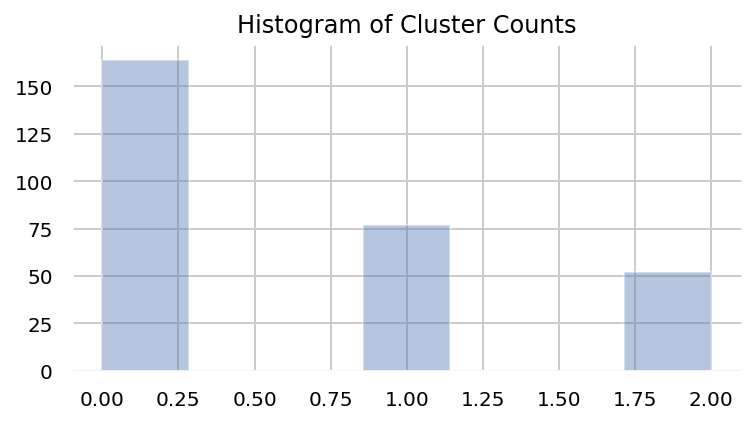

In [77]:
#Visualzation of Clusters
ax = plt.subplots(figsize=(6, 3))
ax = sns.distplot(cluster_labels, kde=False)
title = "Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [78]:
#because there are many dimenions 400 it is impossible to visualize in pair plot unless we bring
#down the number of dimenions to at least 3 by using PCA method. One more option is to visualise 2 dimesions at a time. For example, visalise price against age.

#### Model Evaluation

In [79]:
from sklearn.metrics import silhouette_score
score = silhouette_score(test_sample, cluster_labels, metric='euclidean')

In [80]:
#Score ranges between 0 to 1. where 1 is perfect and 0 is worst.
score

0.52705705

#### Generating never before seen data

In [81]:
df_dummy=df_transact.iloc[0:1]
df_dummy.head()

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,object,0.51,1,object,Maria Shorts.,object,Shorts,Garment Lower body,...,Divided Basics,object,Jersey Basic,Short shorts in lightweight sweatshirt fabric ...,category,category,category,category,20.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...


In [82]:
df_dummy['price']=0.63
df_dummy['garment_group_name']='Outdoor'
df_dummy['product_type_name']='Top'
df_dummy['age']=25.0
df_dummy.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,7/26/19,f130606dcf9f69da0c23d61a21957f88c19debf15d7e0f...,object,0.63,1,object,Maria Shorts.,object,Top,Garment Lower body,...,Divided Basics,object,Outdoor,Short shorts in lightweight sweatshirt fabric ...,category,category,category,category,25.0,5fb9d1e1aa0193a227da2d0d1531c2851777dbd9f6b8b8...


In [83]:
categorical_vars =['product_type_name','club_member_status','department_name','section_name','Active','garment_group_name','sales_channel_id']

In [84]:
#The new dataframe is : df_test_under Use this !
encoder_vars_array = OHE.transform(df_dummy[categorical_vars])

In [85]:
encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

In [86]:
df_categorical=pd.DataFrame(encoder_vars_array,columns = encoder_feature_names)

In [87]:
numeric_vars=['price','age']
df_numeric=df_dummy[numeric_vars]

In [88]:
df_dummyfinal = pd.concat([df_numeric.reset_index(drop=True), df_categorical.reset_index(drop=True)], axis = 1)

In [89]:
#Converting sample into float
test_sample=df_dummyfinal.values.astype('float32')

In [90]:
#Making prediction on the test data
results=predictor.predict(test_sample)

In [91]:
#unpacking the json payload
cluster_labels = [r.label["closest_cluster"].float32_tensor.values[0] for r in results]

In [92]:
#Value count of the Kmeans clusters data points
pd.DataFrame(cluster_labels)[0].value_counts()

0.0    1
Name: 0, dtype: int64

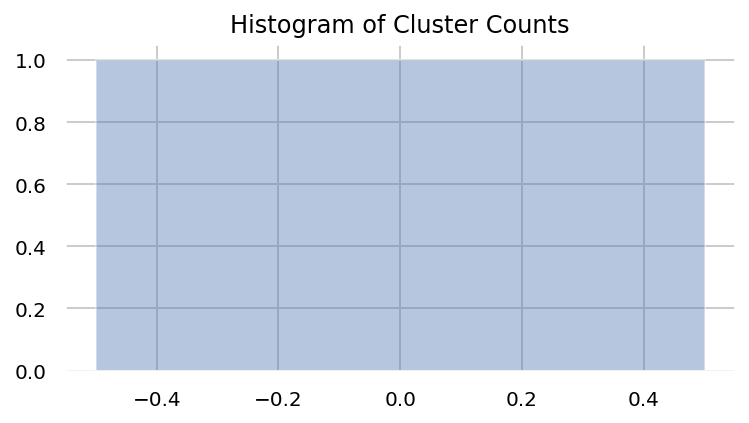

In [93]:
#Visualzation of Clusters
ax = plt.subplots(figsize=(6, 3))
ax = sns.distplot(cluster_labels, kde=False)
title = "Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()